In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from gstatsMCMC import Topography
from gstatsMCMC import MCMC
import gstatsim as gs

In [3]:
# load compiled bed elevation measurements
df = pd.read_csv('PineIslandGriddedMASKED.csv')

In [4]:
# create a grid of x and y coordinates
x_uniq = np.unique(df.x)
y_uniq = np.unique(df.y)

xmin = np.min(x_uniq)
xmax = np.max(x_uniq)
ymin = np.min(y_uniq)
ymax = np.max(y_uniq)

cols = len(x_uniq)
rows = len(y_uniq)

resolution = 500

xx, yy = np.meshgrid(x_uniq, y_uniq)

In [5]:
df

,x,y,surf,bed,velx,vely,smb,dhdt,final_mask,bedmap_mask,bedmap_surf,bedmachine_source,bedmachine_thickness,bedmap_bed
0,-1800250,-400250,646.0,NaN,NaN,NaN,0.881945,0.231120,False,1.0,646.0,5.0,498.687241,65.0
1,-1799750,-400250,637.0,NaN,NaN,NaN,0.874871,0.228965,False,1.0,637.0,5.0,496.910477,63.0
2,-1799250,-400250,631.0,NaN,NaN,NaN,0.863497,0.225059,False,1.0,631.0,5.0,495.085342,63.0
3,-1798750,-400250,624.0,NaN,NaN,NaN,0.851948,0.221152,False,1.0,624.0,5.0,492.501968,63.0
4,-1798250,-400250,616.0,NaN,NaN,NaN,0.840399,0.217246,False,1.0,616.0,5.0,489.341812,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205395,-1102750,29750,1818.0,NaN,-0.280854,8.834806,0.230549,0.019440,False,1.0,1818.0,5.0,2072.520630,-432.0
1205396,-1102250,29750,1816.0,NaN,-0.046678,8.919265,0.230947,0.010326,False,1.0,1816.0,5.0,2061.880737,-415.0
1205397,-1101750,29750,1814.0,NaN,0.347563,7.736511,0.231345,0.001211,False,1.0,1814.0,5.0,2048.679871,-403.0
1205398,-1101250,29750,1815.0,NaN,0.192772,5.615696,0.231743,-0.007904,False,1.0,1815.0,5.0,2031.659790,-395.0


In [6]:
df_cropped = df[(df['x']>-1750250)&(df['x']<-1200250)&(df['y']>-390250)&(df['y']<30250)].copy()

In [7]:
df_cropped

,x,y,surf,bed,velx,vely,smb,dhdt,final_mask,bedmap_mask,bedmap_surf,bedmachine_source,bedmachine_thickness,bedmap_bed
29501,-1749750,-389750,197.0,NaN,-38.349506,2.884825,0.164456,0.416048,False,1.0,197.0,3.0,110.019764,-47.0
29502,-1749250,-389750,235.0,NaN,-32.821974,2.435352,0.180030,0.421256,False,1.0,235.0,3.0,78.526875,-77.0
29503,-1748750,-389750,266.0,NaN,-27.747902,1.805880,0.195604,0.431413,False,1.0,266.0,3.0,40.602303,-95.0
29504,-1748250,-389750,292.0,NaN,-23.554756,1.810101,0.211178,0.443132,False,1.0,292.0,3.0,30.169655,-73.0
29505,-1747750,-389750,305.0,NaN,-20.156616,1.874327,0.226752,0.446152,False,1.0,305.0,3.0,29.452515,-57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205195,-1202750,29750,2029.0,958.0,-3.095513,-0.054570,0.216469,-0.050039,False,1.0,2029.0,5.0,1611.182251,866.0
1205196,-1202250,29750,2032.0,966.0,-2.992425,-0.547878,0.215868,-0.051341,False,1.0,2032.0,5.0,1602.502441,871.0
1205197,-1201750,29750,2035.0,969.0,-2.918455,-0.960309,0.215268,-0.052643,False,1.0,2035.0,5.0,1593.758911,845.0
1205198,-1201250,29750,2036.0,NaN,-3.418364,-0.748867,0.214667,-0.053945,False,1.0,2036.0,5.0,1582.551819,778.0


In [8]:
# create a grid of x and y coordinates
x_uniq = np.unique(df_cropped.x)
y_uniq = np.unique(df_cropped.y)

xmin = np.min(x_uniq)
xmax = np.max(x_uniq)
ymin = np.min(y_uniq)
ymax = np.max(y_uniq)

cols = len(x_uniq)
rows = len(y_uniq)

resolution = 500

xx, yy = np.meshgrid(x_uniq, y_uniq)

(-1750000.0, -1200500.0, -390000.0, 30000.0)

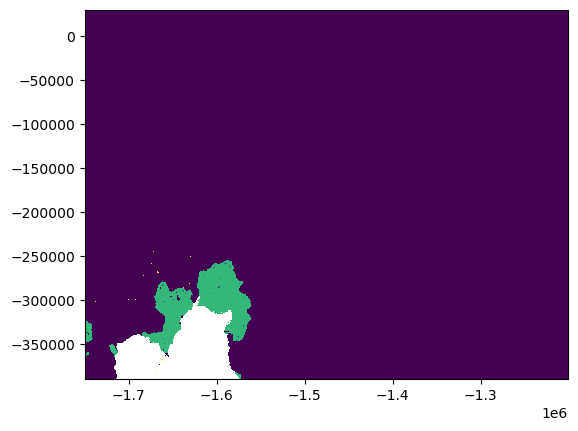

In [9]:
plt.pcolormesh(xx,yy,df_cropped['bedmap_mask'].values.reshape(xx.shape))
plt.axis('scaled')

(-1750000.0, -1200500.0, -390000.0, 30000.0)

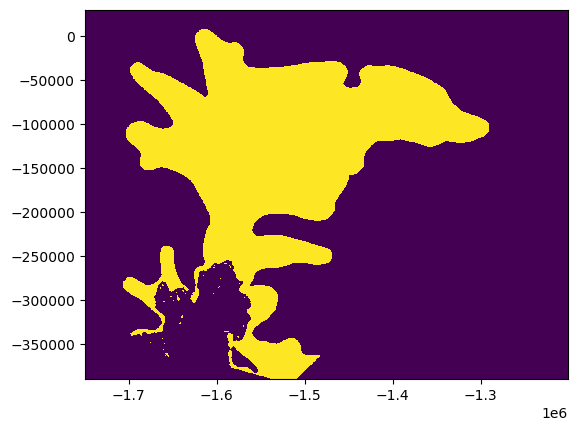

In [11]:
plt.pcolormesh(xx,yy,df_cropped['final_mask'].values.reshape(xx.shape))
plt.axis('scaled')

(-1750000.0, -1200500.0, -390000.0, 30000.0)

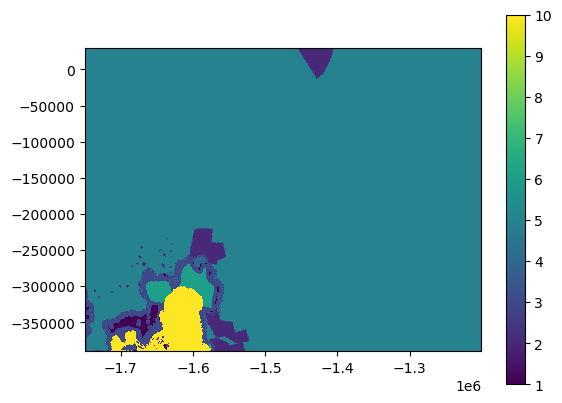

In [12]:
plt.pcolormesh(xx,yy,df_cropped['bedmachine_source'].values.reshape(xx.shape))
plt.colorbar()
plt.axis('scaled')

In [13]:
df_cropped.to_csv('PineIslandGriddedMASKED_cropped.csv')